In [ ]:
# Εισαγωγή των κατάλληλων βιβλιοθηκών
import networkx as nx 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics     
from matplotlib.cm import ScalarMappable
import plotly.express as px
from networkx.algorithms.community import greedy_modularity_communities
import networkx.algorithms.community as nx_comm
import itertools
import networkx.algorithms.community as nxcom
from networkx.algorithms.community.centrality import girvan_newman
from matplotlib.pyplot import figure
import time
import community 
from sklearn.cluster import SpectralClustering
from networkx.utils import groups, not_implemented_for, py_random_state
__all__ = ["label_propagation_communities", "asyn_lpa_communities"]
import matplotlib.pyplot as plt

Β μέρος 
Αρχικό Δίκτυο

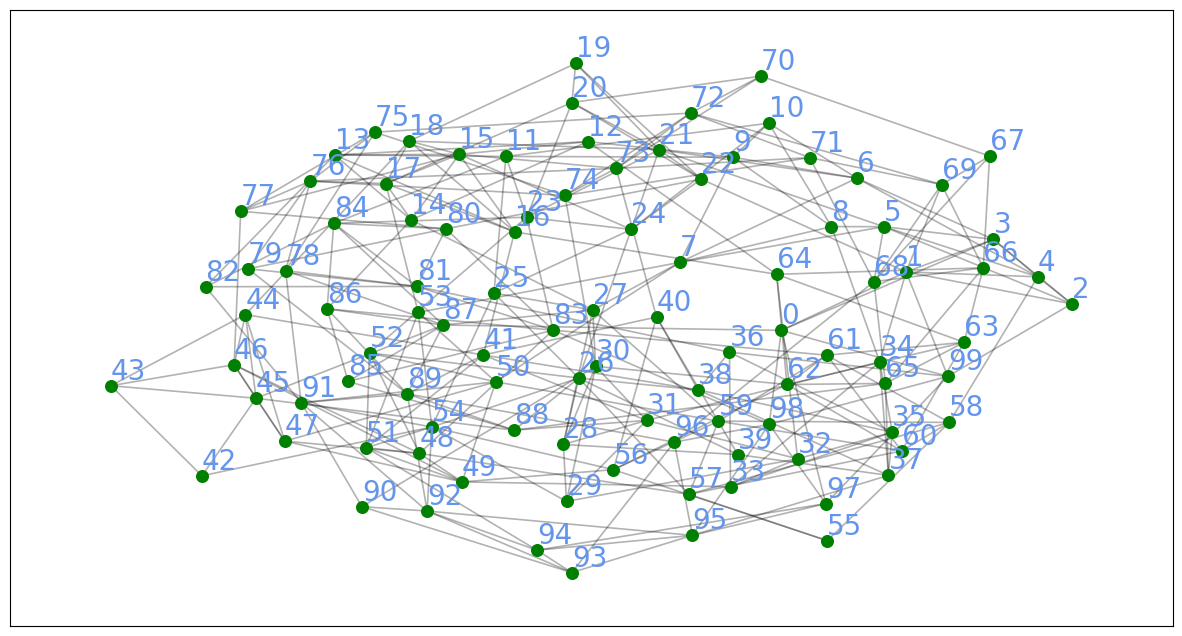

In [ ]:
#Φόρτωση dataset μέσω αρχείου με τις ενώσεις του γράφου
#Ο αυγκεκριμένος γράφος, αποτελεί έναν τυχαίο παραγόμενο γράφο με 100 κόμβους και 300 ακμές
fh = open("SW-100-6-0d3-trial1.edges", "rb")
g = nx.read_edgelist(fh,create_using=nx.Graph(), nodetype=int)
fh.close()
pos = nx.kamada_kawai_layout(g,scale=1000)
#Παράμετροι αριθμών του γράφου
edge_options = {"width": 1.20 , "alpha": .30, "edge_color": "black"}
#Παράμετροι ακμών
node_options = {"node_color": "green", "node_size": 70}
#Οπτικοποίηση του γράφου
node_label_options = {"font_size": 20, "font_color": "cornflowerblue", "verticalalignment": "bottom", "horizontalalignment": "left"}
plt.figure(figsize=(15,8))
pos = nx.kamada_kawai_layout(g)
nx.draw_networkx_nodes(g,pos,**node_options)
nx.draw_networkx_edges(g,pos,**edge_options)
nx.draw_networkx_labels(g,pos,**node_label_options)
plt.show()


1.Βαθμός Κάθε κόμβου

In [ ]:
pd.set_option('display.max_rows',100)
data=nx.degree(g)
df=pd.DataFrame(data, columns=['node','degree'])
df

,node,degree
0,0,6
1,1,8
2,3,6
3,97,5
4,98,6
5,99,6
6,87,8
7,2,5
8,4,6
9,69,6


Κατανομή Βαθμού Δικτύου


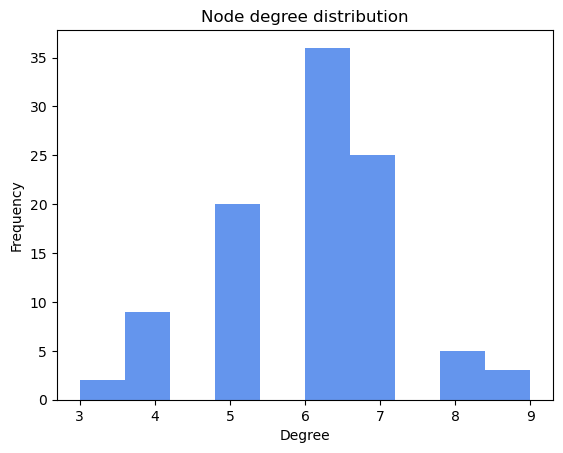

In [ ]:
plt.title("Node degree distribution")
plt.xlabel('Degree')
plt.ylabel('Frequency')

#Οπτικοποίηση του παραπάνω πίνακα κατανομής βαθμού κόμβου
plt.hist([v for k,v in nx.degree(g)],bins=10,color="cornflowerblue")
plt.savefig('Node degree distribution.jpeg')

2.Μέσο μήκος μονποπατιού

In [ ]:
aver_sp=nx.average_shortest_path_length(g)

In [ ]:
aver_sp

3.0305050505050506

3.Clusterring Coefficient

In [ ]:
clust=nx.clustering(g)
nx.average_clustering(g)

0.264174603174603

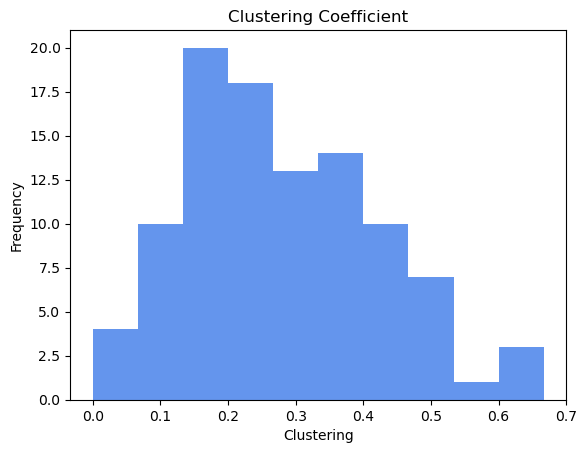

In [ ]:
#Οπτικοποίηση κατανομής clustering coefficient
lcc = nx.clustering(g)
fig, (ax2) = plt.subplots(ncols=1)
ax2.hist(lcc.values(), bins=10,color="cornflowerblue")
ax2.set_title("Clustering Coefficient")
ax2.set_xlabel('Clustering') 
ax2.set_ylabel('Frequency')
plt.savefig('Clustering Coefficient.jpeg')

4.Τιμή κεντρικότητας

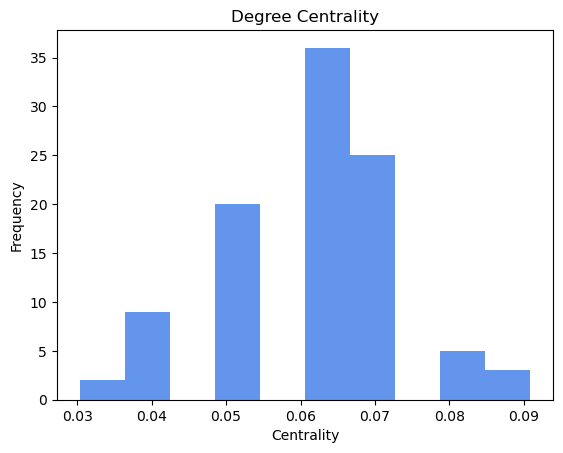

In [ ]:
plt.title("Degree Centrality")
plt.xlabel('Centrality')
plt.ylabel('Frequency')
centr=nx.degree_centrality(g)
plt.hist(nx.centrality.degree_centrality(g).values(),bins=10,color="cornflowerblue")
plt.savefig('Degree Centrality.jpeg')

In [ ]:
#Ορισμός μεταβλητών για χρήση  
cl_ce=nx.closeness_centrality(g) 
be_ce=nx.betweenness_centrality(g)
ei_ve=nx.eigenvector_centrality(g)


Τιμές-Διάγραμμα κεντρικότητας εγγύτητας

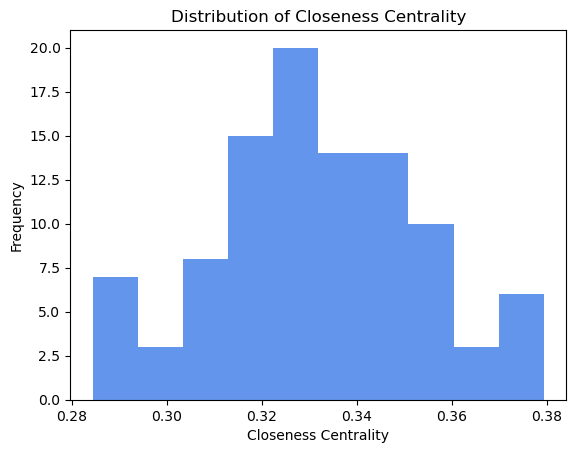

In [ ]:
fig, (cl) = plt.subplots(ncols=1)
cl.hist(cl_ce.values(), bins=10,color="cornflowerblue")
cl.set_xlabel('Closeness Centrality')
cl.set_ylabel('Frequency')
cl.set_title("Distribution of Closeness Centrality")
plt.savefig('Closeness Centrality.jpeg')

Τιμές-Διάγραμμα Ενδιαμεσικής κεντρικότητας

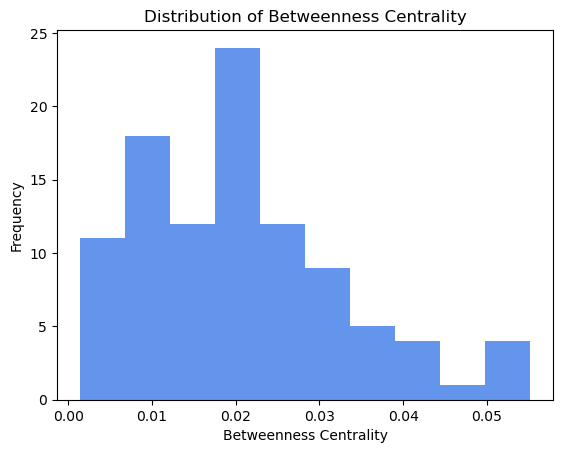

In [ ]:
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.title("Distribution of Betweenness Centrality")
plt.hist(nx.centrality.betweenness_centrality(g).values(),bins=10,color="cornflowerblue")
plt.savefig('Betweenness Centrality.jpeg')

Τιμές-Διάγραμμα Κεντρικότητα ιδιοδιανυσμάτων

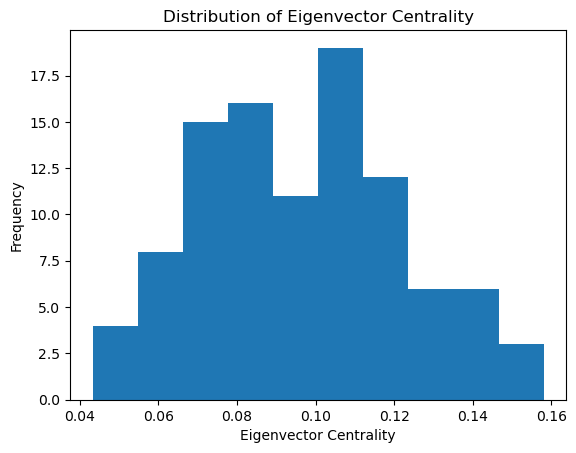

In [ ]:
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.title("Distribution of Eigenvector Centrality")
plt.hist(nx.centrality.eigenvector_centrality(g).values(),bins=10)
plt.savefig('Eigenvector Centrality.jpeg')

Γ Μέρος

Modularity maximization

The graph has 6 communities.


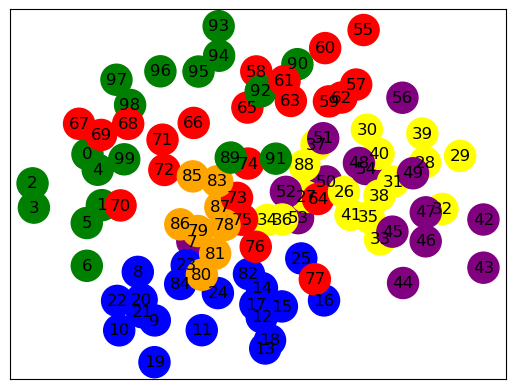

[frozenset({64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 55, 57, 58, 59, 60, 61, 62, 63}), frozenset({8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 82, 84}), frozenset({0, 1, 2, 3, 4, 5, 6, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}), frozenset({88, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41}), frozenset({7, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56}), frozenset({78, 79, 80, 81, 83, 85, 86, 87})]
Modularity: 0.5288666666666667
Time taken:0.27seconds


<Figure size 640x480 with 0 Axes>

In [ ]:
start_time = time.time()
communities_mod=pd.DataFrame()
communities_mod.rename(columns = {'':'Communities'})
communities_mod = sorted(nxcom.greedy_modularity_communities(g), key=len, reverse=True)
communities_mod
print(f"The graph has {len(communities_mod)} communities.")

c = list(greedy_modularity_communities(g))
sortedCommunities = []


for community_mod in c:
    sortedCommunities.append(sorted(community_mod))

    
community_colors = ["red", "blue", "green", "yellow", "purple", "orange"]

# Αντιστοίχηση κόμβων με κατάλληλο χρ΄ωμα βάσει της εύρεσης κοινωτήτων
node_colors = []
for node in g.nodes():
    for i, community in enumerate(communities_mod):
        if node in community:
            node_colors.append(community_colors[i])

pos = nx.spring_layout(g)

# Χρωματισμός κάθε κόμβου ανάλογα με το χρώμα της κοινότητας
nx.draw_networkx_nodes(g, pos, node_color=node_colors, node_size=500)

# Πρόσθεση αριθμών πάνω στους κόμβους
nx.draw_networkx_labels(g, pos)

# Οπτικοποίηση
plt.show()
print (communities_mod)
#Τιμή modularity
modularity = nx_comm.modularity(g, communities_mod)
print ("Modularity:", modularity)
print("Time taken:%.2fseconds"%(time.time()-start_time))
plt.savefig('Modularity maximization communities.jpeg')

Spectral clustering

In [ ]:
adj_matrix = nx.to_numpy_matrix(g)

spectral_clustering = SpectralClustering(n_clusters=6)
spectral_clustering.fit(adj_matrix)

cluster_assignments = spectral_clustering.labels_.tolist()
adj_matrix

C:\Users\Leo\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\Leo\anaconda3\lib\site-packages\sklearn\cluster\_spectral.py:589: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(


matrix([[0., 1., 1., ..., 0., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Community  0 : [44, 68, 77, 78, 79, 80, 81, 82]
Community  1 : [3, 4, 6, 10, 21, 22, 23, 30, 37, 41, 49, 50, 51, 52, 53, 54, 56, 58, 59, 60, 61, 63, 65, 66, 67, 69, 72, 73, 74, 75, 76, 83, 84, 85, 92, 98, 99]
Community  2 : [12, 13, 15, 16, 19, 20]
Community  3 : [9, 11, 17, 18, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 38, 39, 40, 42, 43, 45, 46, 47, 48, 62, 70, 71, 90, 91, 93, 94, 95, 96, 97]
Community  4 : [0, 1, 2, 5, 7, 8]
Community  5 : [14, 55, 57, 64, 86, 87, 88, 89]


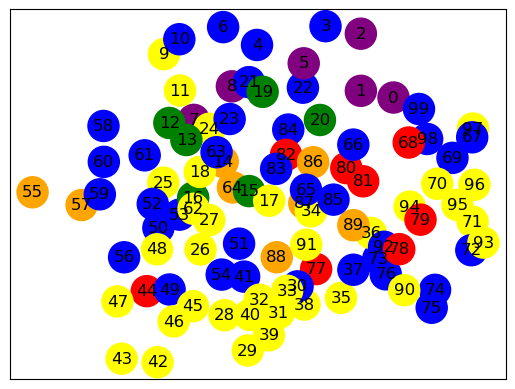

Modularity: 0.13527222222222224
Time taken:0.22seconds


<Figure size 640x480 with 0 Axes>

In [ ]:
start_time = time.time()

n_clusters=6    

for i in range(n_clusters):
        print("Community ", i, ":", [j for j, x in enumerate(cluster_assignments) if x == i])
communities = {i: [j for j, x in enumerate(cluster_assignments) if x == i] for i in range(n_clusters)}
communities_spec = {index: community_number for community_number, indices in communities.items() for index in indices}

# Αντιστοίχηση κόμβων με κατάλληλο χρ΄ωμα βάσει της εύρεσης κοινωτήτων
community_colors = ["red", "blue", "green", "yellow", "purple", "orange"]

node_colors = [community_colors[communities_spec[node]] for node in g.nodes()]

pos = nx.spring_layout(g)

# Χρωματισμός κάθε κόμβου ανάλογα με το χρώμα της κοινότητας
nx.draw_networkx_nodes(g, pos, node_color=node_colors, node_size=500)

# Πρόσθεση αριθμών πάνω στους κόμβους
nx.draw_networkx_labels(g, pos)

# Οπτικοποίηση
plt.show()
import community 
modularity_spec=community.modularity(communities_spec, g)
print("Modularity:",modularity_spec)
print("Time taken:%.2fseconds"%(time.time()-start_time))
plt.savefig('Spectral clustering communities.jpeg')

Girvan Newman 

In [ ]:
def girwan_newman(g, no_of_components_to_split):
    while(no_of_components_to_split > nx.algorithms.components.number_connected_components(g)):
        # Υπολογισμός betweeness centrality
        btw_centrality = nx.algorithms.centrality.edge_betweenness_centrality(g)
        # Ταξινόμηση βάση betweeness centrality
        sorted_edges = sorted(btw_centrality.items(), key = lambda item:item[1], reverse = True)[0]   
        # Αφαίρεση ακμών με μεγαλύτερο betweeness centrality προκειμένου να προκ΄υψουν κοινώτητες 
        print('Removing the edge', sorted_edges)
        g.remove_edge(*sorted_edges[0])

    # Έλεγχος για το αν ο γράφος έχει αποσυνδεθεί 
    if(no_of_components_to_split <= nx.algorithms.components.number_connected_components(g)):
        # Σχεδίαση του γράφου                                                  
        nx.draw_networkx(g, with_labels=True)
        list_of_nodes = [c for c in sorted(nx.connected_components(g), key=len, reverse=True)]
        figure(figsize=(50, 100))

        return list_of_nodes

Removing the edge ((0, 87), 0.027013207381423005)
Removing the edge ((98, 83), 0.030131108084668463)
Removing the edge ((1, 22), 0.02819376144670812)
Removing the edge ((36, 81), 0.02818634472864701)
Removing the edge ((89, 96), 0.02965913971883072)
Removing the edge ((5, 21), 0.030380128647306687)
Removing the edge ((24, 26), 0.028342159510464617)
Removing the edge ((51, 94), 0.026667962156803993)
Removing the edge ((54, 92), 0.030561090558128026)
Removing the edge ((89, 92), 0.028593179666546238)
Removing the edge ((91, 92), 0.04307946015670317)
Removing the edge ((90, 91), 0.03759140127130303)
Removing the edge ((30, 90), 0.04641028895581385)
Removing the edge ((37, 95), 0.06941603901135014)
Removing the edge ((68, 96), 0.08885652149120073)
Removing the edge ((99, 36), 0.06425573338778612)
Removing the edge ((1, 34), 0.07434793644031894)
Removing the edge ((0, 3), 0.08170706435052062)
Removing the edge ((99, 2), 0.07580387670360933)
Removing the edge ((0, 1), 0.09090909090909091)
Re

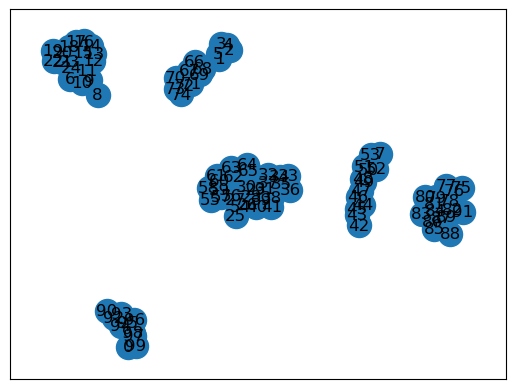

<Figure size 5000x10000 with 0 Axes>

In [ ]:
start_time = time.time()
communities_girv = girwan_newman(g,6)
print(communities_girv)
modularity = nx_comm.modularity(g, communities_girv)
print("Modularity:",modularity)
print("Time taken:%.2fseconds"%(time.time()-start_time))
plt.savefig('Girvan-Newman.jpeg')

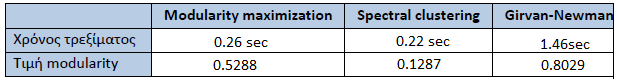

In [ ]:
from PIL import Image 
myImage = Image.open("Results Matrix.PNG"); myImage.show();
myImage